In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.metrics import average_precision_score

In [3]:
c_data =pd.read_csv('customer_data.csv')
t_data =pd.read_csv('transaction_data.csv')

In [4]:
c_data.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [5]:
c_data.shape

(168, 10)

In [8]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


#### No nulls in the data

In [9]:
c_data.describe()

,Unnamed: 0,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714
std,48.641546,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000
50%,83.500000,4.000000,3.000000,1.000000
75%,125.250000,5.000000,4.000000,2.000000
max,167.000000,15.000000,8.000000,15.000000


In [6]:
t_data.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [7]:
t_data.shape

(623, 11)

In [10]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


#### No nulls in transaction data

In [11]:
t_data.describe()

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fraud', ylabel='count'>

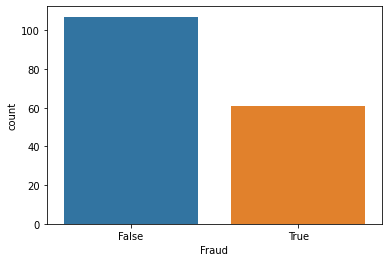

In [15]:
# let us first check the distribution of the target class

sns.countplot(c_data['Fraud'])

#### Its an imbalanced dataset with more False Fraud compared to True

<AxesSubplot:xlabel='No_Orders', ylabel='count'>

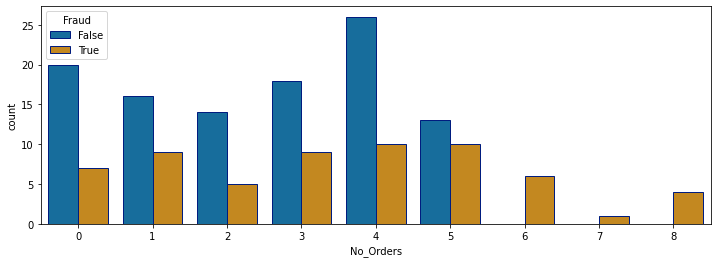

In [20]:
# Show the number of fraud and not fraud customers by num orders
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='No_Orders', hue='Fraud', 
              data = c_data, palette="colorblind", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))

#### Here we can say that, if num orders are more than 5 than chancing of being a Fraud customer increases compared to true customers

<AxesSubplot:xlabel='paymentMethodType', ylabel='count'>

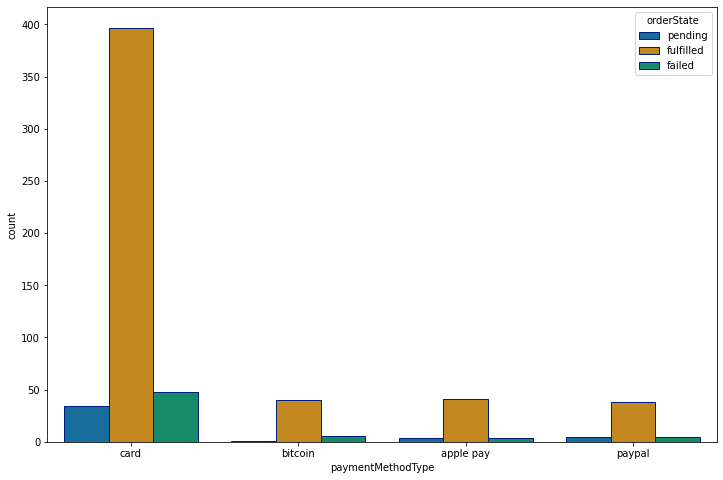

In [22]:
# Show the number of order state by payment method type
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='paymentMethodType', hue='orderState', 
              data = t_data, palette="colorblind", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))

#### The ratio of failed orders to fullfiled orders seems higher for bitcoin and paypal.
#### Card is the frequently used payment option for customers

In [40]:
#one-hot encoding transaction details
df1 = pd.get_dummies(t_data['paymentMethodType'], drop_first=True)
df2 = pd.get_dummies(t_data['paymentMethodProvider'], drop_first=True)
df3 = pd.get_dummies(t_data['orderState'], drop_first=True)

In [41]:
#merge and drop unecessary columns in transaction details
transac=t_data[['customerEmail','transactionAmount']]
transac_details = pd.concat([transac,df1,df2,df3], axis=1)
transac_details.drop_duplicates(subset='customerEmail', keep='first', inplace=True)

# dropping duplicates in customer details 
c_data.drop_duplicates(subset='customerEmail', keep='first', inplace=True)

#merging customer and transaction details 
final_data=pd.merge(c_data,transac_details,on='customerEmail')

In [43]:
final_data.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,Discover,JCB 15 digit,JCB 16 digit,Maestro,Mastercard,VISA 13 digit,VISA 16 digit,Voyager,fulfilled,pending
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,...,0,0,1,0,0,0,0,0,0,1
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,...,0,0,0,0,0,0,0,0,1,0
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,...,0,0,1,0,0,0,0,0,0,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,...,0,0,0,0,0,0,0,1,1,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,...,0,0,0,0,0,1,0,0,1,0


In [44]:
# removing columns that are not useful

final_data = final_data.drop(columns=['Unnamed: 0','customerEmail', 'customerPhone','customerDevice',
                        'customerIPAddress','customerBillingAddress'])

In [45]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   No_Transactions              136 non-null    int64
 1   No_Orders                    136 non-null    int64
 2   No_Payments                  136 non-null    int64
 3   Fraud                        136 non-null    bool 
 4   transactionAmount            136 non-null    int64
 5   bitcoin                      136 non-null    uint8
 6   card                         136 non-null    uint8
 7   paypal                       136 non-null    uint8
 8   Diners Club / Carte Blanche  136 non-null    uint8
 9   Discover                     136 non-null    uint8
 10  JCB 15 digit                 136 non-null    uint8
 11  JCB 16 digit                 136 non-null    uint8
 12  Maestro                      136 non-null    uint8
 13  Mastercard                   136 non-null    uint8

In [47]:
# separating feature and target variable
y=final_data['Fraud']
X = final_data.drop(columns=['Fraud'])

In [50]:
# Since we have class imbalance (i.e. more true compared to Fraud)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=7,
                                                    stratify=y)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (108, 18)
Number transactions y_train dataset:  (108,)
Number transactions X_test dataset:  (28, 18)
Number transactions y_test dataset:  (28,)


In [51]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier, n_jobs=1,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=125, random_state=7)
best params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 125}
best score: 0.7660714285714285


* Fitting random forest classifier, which can be used for fitting non-linear and complex data to predict class labels
* Random Forest classifier is being chosen here because it reduces variance as it depends on the decision taken by a combination of decision trees, hence will avoid overfitting
* Using random forest, we can also get feature importance in the data
* Random forest doesn't require any scaling and outlier treatment of the data
* Here creating various combinations of hyper-parameters and getting the model with the best roc_auc score.
* For imbalanced dataset, roc_auc will be the right metric as it is a measure of how well or how confidently a model is able to predict the class

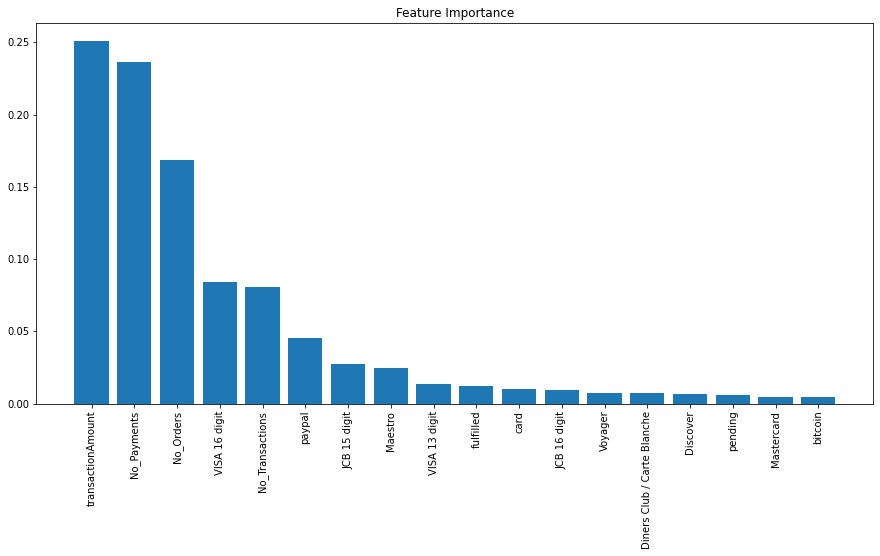

In [52]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

Text(0.5, 257.44, 'Predicted label')

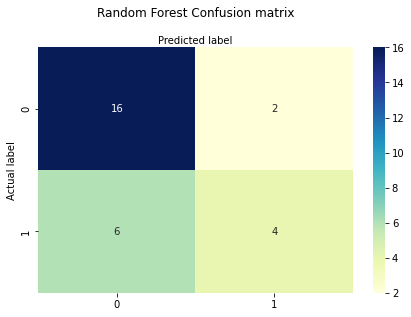

In [53]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

       False       0.73      0.89      0.80        18
        True       0.67      0.40      0.50        10

    accuracy                           0.71        28
   macro avg       0.70      0.64      0.65        28
weighted avg       0.71      0.71      0.69        28



In [55]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.594


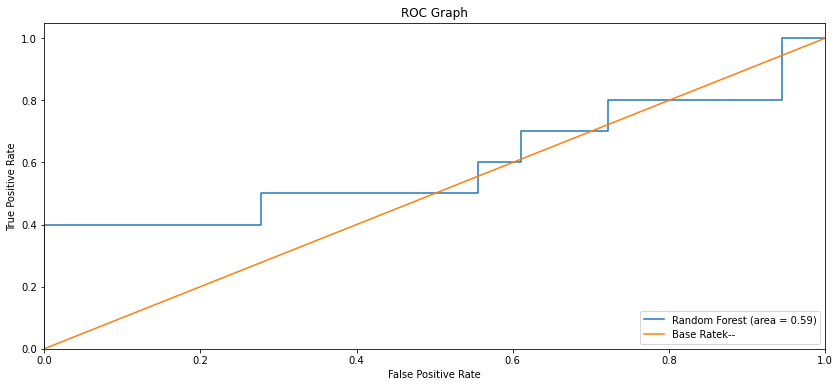

In [58]:
# Create ROC Graph
from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### Conclusion

* In this example we need to reduce False Negatives which means it was a fraud customer but algorithm treated it as true
* We got a roc_auc score of almost 60% which is fine based on the limited data that we have
* Number of payments and transaction amount are the two main key features behind classifying a customer as true or fraud

### How to imporve model's accuracy

* The model's accuracy can be increased by doing feature selection based on various statistical tests like chi2 test etc.
* By getting more data
* By adding more relevant features
* By using a different model like logistic regression, Xgboost
* The model and threshold for distinguishing classes should be considered from roc graph
* False positive rate should be less and True positive rate should be more

Once the algo is able to predict fraud customers with better roc_auc score, the customer should be immediately blocked from the system and reported to cyber security team.

### References

* https://medium.com/analytics-vidhya/predict-employee-attrition-a34e2c5a972d
* https://www.kaggle.com/code/yamineeravi/notebook5b85674712
* Saputra, Adi & Suharjito, Suharjito. (2019). Fraud Detection using Machine Learning in e-Commerce. 10.14569/IJACSA.2019.0100943.     